In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Trigonometric Interpolation

In [ ]:
# AI usage: This plotting code is written with help of Github Copilot
import numpy as np
import matplotlib.pyplot as plt
def plot_root_of_unity(n):
    angles = np.linspace(0, 2*np.pi, n, endpoint=False)
    roots = np.exp(1j * angles)
    
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_aspect('equal')
    ax.grid(True)
    
    # Set coordinate limits
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    
    # Plot the unit circle
    circle = plt.Circle((0, 0), 1, color='black', ls=':', fill=False)
    ax.add_artist(circle)
    
    # Plot the primitive roots of unity
    ax.plot(np.real(roots), np.imag(roots), 'bo', markersize=12)
    
    # Add dashed lines connecting each root to the origin
    for root in roots:
        ax.plot([0, np.real(root)], [0, np.imag(root)], 'k:', linewidth=0.5)
    
    # Add x and y coordinate axes as arrows
    ax.arrow(-1.1, 0, 2.2, 0, head_width=0.05, head_length=0.1, fc='black', ec='black')
    ax.arrow(0, -1.1, 0, 2.2, head_width=0.05, head_length=0.1, fc='black', ec='black')

    plt.show() 

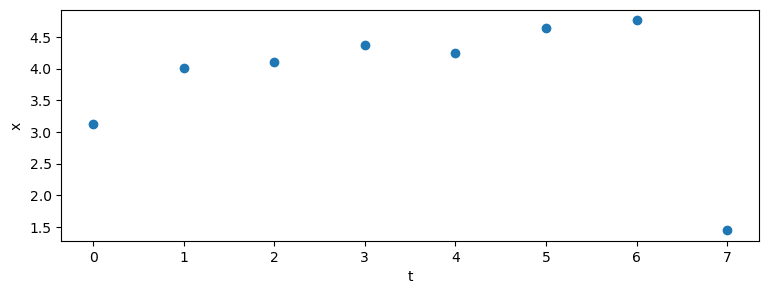

In [2]:
"""Interpolation (only for a figure)
"""
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(8)
y = np.random.uniform(1, 5, size=8)

plt.figure(figsize=(9, 3))  
plt.scatter(x, y)
plt.xlabel('t')
plt.ylabel('x')
plt.show()

Example from Park's notes
Find the five-term trigonometric least square fit for the data $x = [-2.2,-2.8,-6.1,-3.9,0,1.1,-0.6,-1.1]$ on the interval $[0,1]$ at evenly spaced nodes $t_j = h_j (j = 0,1,\dots,7), h = 1/8$. This time, use the basis functions that are given above. Also, plot it. Before the exact fit was $ \\
P(t) = -1.95 - 0.7445\text{cos}2\pi t -2.5594\text{sin}2\pi t + 1.125 \text{cos}4\pi t + 0.825\text{sin}4\pi t - 0.3555\text{cos}6\pi t + 0.1906\text{sin}6\pi t - 0.2750 \text{cos}8\pi t$ 

In [5]:
plt.rcParams['font.size'] = 16

def lin_comb(fs, cs, x, plot=False, **kwarg):
    """
    Return 1D array of the linear combination of functions evaluated at a grid domain.

    Input:
        fs (list): (stands for functions) ndarray compatible functions
        cs (array-like): (stands for coefficients) coefficients of same length of fs
        x: grid domain
    Output:
        cfs: (stands for c*f's) array of function values of the linear combination evaluated
        at the grid domain.
    Side-effect:
        plot
    """
    cfs = np.zeros((len(fs), len(x)))

    for i, f in enumerate(fs):
        cfs[i, :] = cs[i]*fs[i](x)
    
    cfs = np.sum(cfs, axis=0)
    if plot==True:
        plt.figure(figsize=(9, 3))  
        plt.plot(x, cfs, label="Linear combination")
        plt.show()

    return cfs

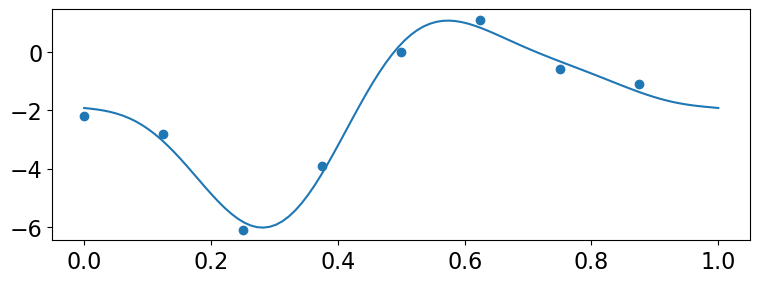

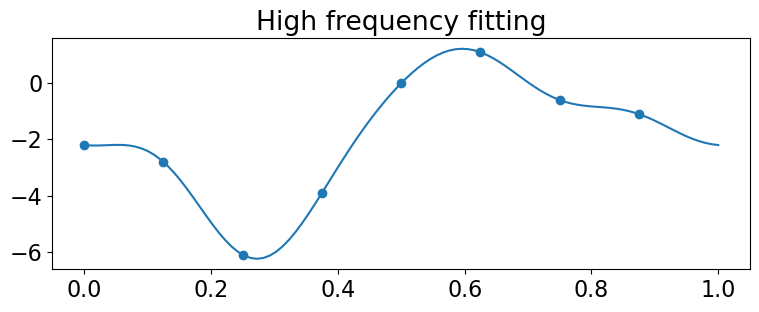

In [10]:
"""
Trigonometric least square
Suggested activity
(a) k = 8 (sanity check), 1, 2, 3, 4, 5, 6, 7, 8
(b) Analogy to Pythagorean theorem.
(c) Toggle on high frequency approximation and repeat (a)
"""

# data to fit
c, d = 0, 1
n = 8
x = np.array([-2.2, -2.8, -6.1, -3.9, 0.0, 1.1, -0.6, -1.1])
t = np.arange(n)*(d-c)/n

# model info
k = 7 # number of basis fns included in fitting
fs = [
lambda t: (1./np.sqrt(n)),
lambda t: (2./np.sqrt(n)) * np.cos(2.*np.pi*(t-c)/(d-c)),
lambda t: (2./np.sqrt(n)) * np.sin(2.*np.pi*(t-c)/(d-c)),
lambda t: (2./np.sqrt(n)) * np.cos(4.*np.pi*(t-c)/(d-c)),
lambda t: (2./np.sqrt(n)) * np.sin(4.*np.pi*(t-c)/(d-c)),
lambda t: (2./np.sqrt(n)) * np.cos(6.*np.pi*(t-c)/(d-c)),
lambda t: (2./np.sqrt(n)) * np.sin(6.*np.pi*(t-c)/(d-c)),
lambda t: (1./np.sqrt(n)) * np.cos(8.*np.pi*(t-c)/(d-c)),
]
cs = [-5.5154, -1.0528, -3.6195, 1.5910, 1.1667, -0.5028, 0.2695, -0.7778]

# plotting parameters
p = 100
tt = np.linspace(c, d, p)



cfs = lin_comb(fs[:k], cs[:k], tt)

plt.figure(figsize=(9, 3))
plt.scatter(t, x)
plt.plot(tt, cfs)
plt.show()

# High frequency fitting
#  constant term added to make comparison fairer.
cfs = lin_comb(fs[-1:-1-k:-1], cs[-1:-1-k:-1], tt)  + cs[0]*fs[0](1.)

plt.figure(figsize=(9, 3))
plt.scatter(t, x)
plt.plot(tt, cfs)
plt.title("High frequency fitting")
plt.show()

### Denoising Example
Settings:
* a pure signal and white noises are mixed up
* pure signal: $f(t) = \text{sin}(2\pi f_1t) + \text{sin}(2\pi f_2t)$
* white noise: random values of maximum 2.5
Goal:
* recover the pure signal by filtering out the white noise

`numpy.random.randn` returns a sample (or samples) from the standard normal distribution

In [11]:
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size': 18})

# Create a simple signal with two frequencies
dt = 0.001
t = np.arange(0,1,dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) # Sum of 2 frequencies
f_clean = f
f = f + 2.5*np.random.randn(len(t)) # Add some noise

In [12]:
## Compute the Fast Fourier Transform (FFT)

n = len(t)
fhat = np.fft.fft(f,n)                     # Compute the FFT
PSD = fhat * np.conj(fhat) / n             # Power spectrum (power per freq)
freq = (1/(dt*n)) * np.arange(n)           # Create x-axis of frequencies in Hz
L = np.arange(1,np.floor(n/2),dtype='int') # Only plot the first half of freqs

In [13]:
## Use the PSD to filter out noise
indices = PSD > 100       # Find all freqs with large power
PSDclean = PSD * indices  # Zero out all others
fhat = indices * fhat     # Zero out small Fourier coeffs. in Y
ffilt = np.fft.ifft(fhat) # Inverse FFT for filtered time signal

/Users/williammahnke/anaconda3/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


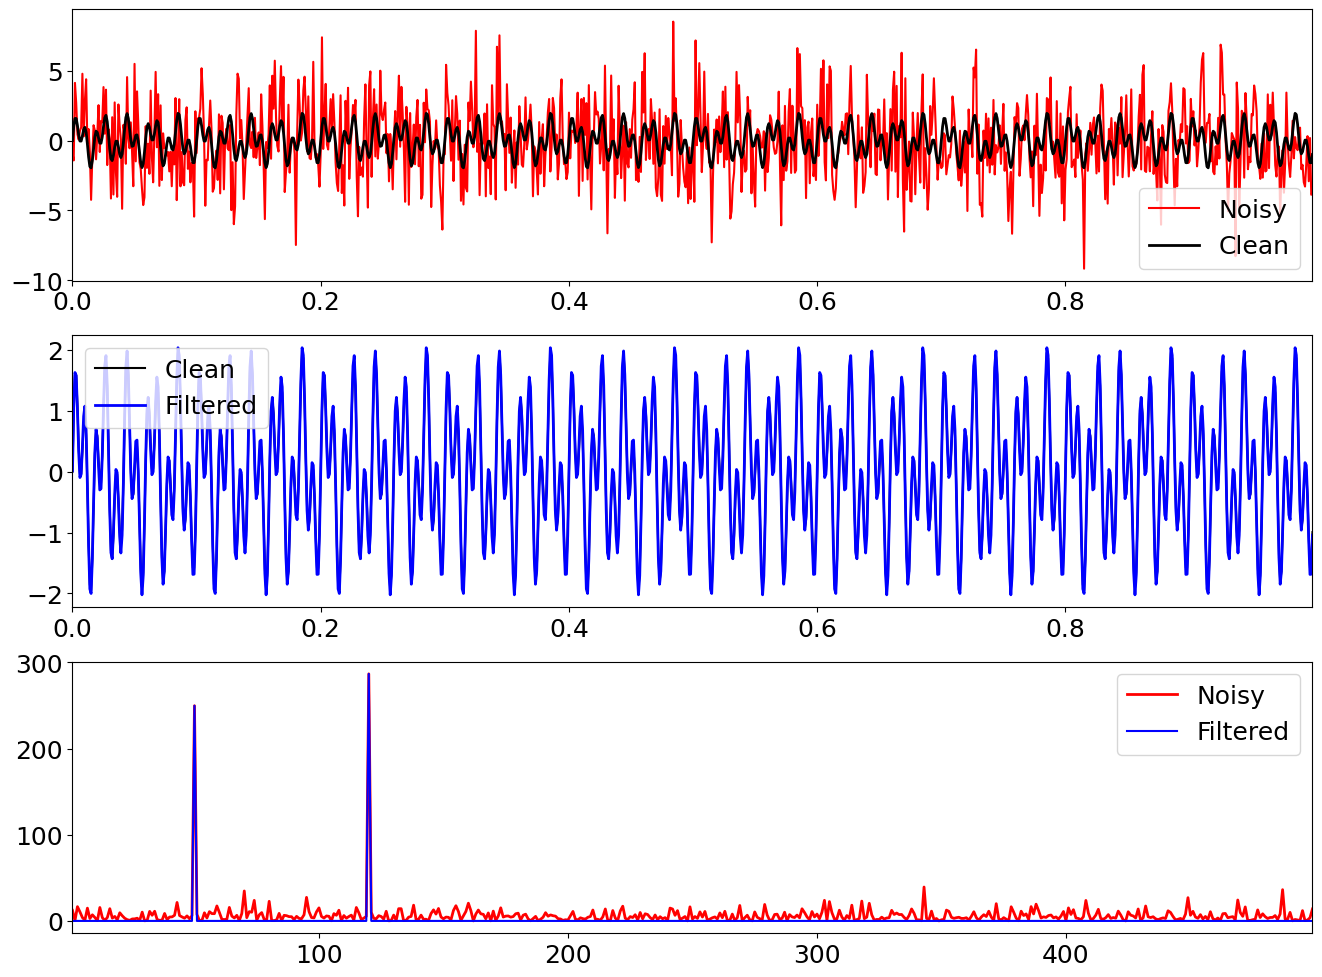

In [14]:
## Plots
fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,f,color='r',linewidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='k',linewidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t,f_clean,color='k',linewidth=1.5,label='Clean')
plt.plot(t,ffilt,color='b',linewidth=2,label='Filtered')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L],PSD[L],color='r',linewidth=2,label='Noisy')
plt.plot(freq[L],PSDclean[L],color='b',linewidth=1.5,label='Filtered')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()